In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
path = '/content/drive/MyDrive/DLFS5/CH05/old_faithful.txt'
xs = np.loadtxt(path)
print(xs.shape)  # (272, 2)

(272, 2)


In [6]:
# 매개변수(초깃값)
phis = np.array([0.5, 0.5])
mus = np.array([[0.0, 50.0], [0.0, 100.0]])
covs = np.array([np.eye(2), np.eye(2)])  # np.eye()로 단위행렬 생성

In [7]:
K = len(phis)     # 가우스 분포 개수(2개)
N = len(xs)       # 데이터 수(272개)
MAX_ITERS = 100   # EM 알고리즘 최대 반복 횟수
THRESHOLD = 1e-4  # EM 알고리즘 갱신 중지 임계값

In [8]:
def multivariate_normal(x, mu, cov):
  det = np.linalg.det(cov)
  inv = np.linalg.inv(cov)
  d = len(x)
  z = 1 / np.sqrt((2 * np.pi) ** d * det)
  y = z * np.exp((x - mu).T @ inv @ (x - mu) / -2.0)
  return y

In [9]:
def gmm(x, phis, mus, covs):
  K = len(phis)
  y = 0
  for k in range(K):
    phi, mu, cov = phis[k], mus[k], covs[k]
    y += phi * multivariate_normal(x, mu, cov)
  return y

In [10]:
def likelihood(xs, phis, mus, covs):
  eps = 1e-8  # log(0)을 방지하기 위한 아주 작은 값
  L = 0
  N = len(xs)
  for x in xs:
    y = gmm(x, phis, mus, covs)
    L += np.log(y + eps)
  return L / N

In [11]:
current_likelihood = likelihood(xs, phis, mus, covs)

for iter in range(MAX_ITERS):
  # E-스텝
  qs = np.zeros((N, K))
  for n in range(N):
    x = xs[n]
    for k in range(K):
      phi, mu, cov = phis[k], mus[k], covs[k]
      qs[n, k] = phi * multivariate_normal(x, mu, cov)
    qs[n] /= gmm(x, phis, mus, covs)

  # M-스텝
  qs_sum = qs.sum(axis=0)  # 미리 계산
  for k in range(K):
    # 1. phis
    phis[k] = qs_sum[k] / N  # 재활용

    # 2. mus
    c = 0
    for n in range(N):
      c += qs[n, k] * xs[n]
    mus[k] = c / qs_sum[k]  # 재활용

    # 3. covs
    c = 0
    for n in range(N):
      z = xs[n] - mus[k]
      z = z[:, np.newaxis]  # 수식과 일치시키기 위해 열 벡터 사용
      c += qs[n, k] * z @ z.T
    covs[k] = c / qs_sum[k]

    # 종료 판정
    print(f'{current_likelihood:.3f}')  # 로그 가능도 출력(소수점 이하 3자리로 표시)

    next_likelihood = likelihood(xs, phis, mus, covs)
    dff = np.abs(next_likelihood - current_likelihood)  # 차이의 절댓값
    if dff < THRESHOLD:
      break
    current_likelihood = next_likelihood

-16.538
-6.627
-4.415
-4.420
-4.357
-4.343
-4.302
-4.277
-4.245
-4.225
-4.200
-4.183
-4.164
-4.163
-4.156
-4.157
-4.155
-4.156
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155
-4.155


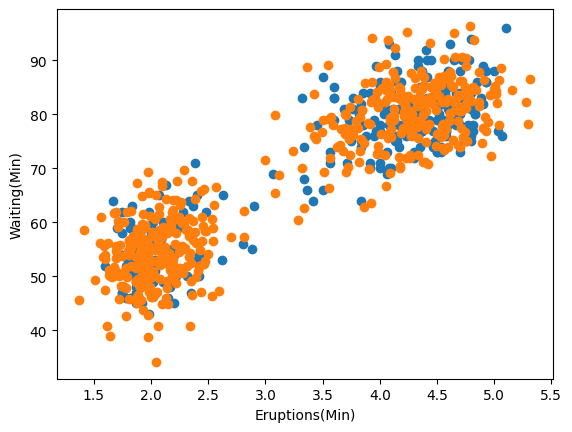

In [20]:
N = 500
new_xs = np.zeros((N, 2))
phis = np.array([0.5, 0.5])
for n in range(N):
  k = np.random.choice(2, p=phis)
  mu, cov = mus[k], covs[k]
  new_xs[n] = np.random.multivariate_normal(mu, cov)

plt.scatter(xs[:, 0], xs[:, 1])
plt.scatter(new_xs[:, 0], new_xs[:, 1])
plt.xlabel('Eruptions(Min)')
plt.ylabel('Waiting(Min)')
plt.show()